<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/Dimensionality%20Reduction/TA/PCA_LDA_Tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 45

## Generating and Plottind data

Accuracy on original data: 1.0000


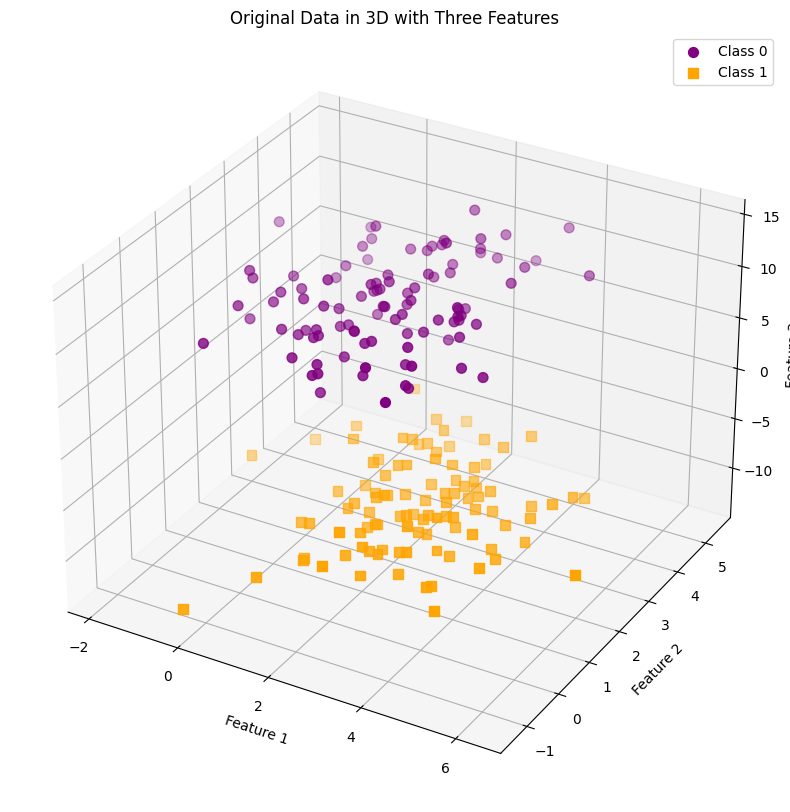

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Create a dataset with 3 features
np.random.seed(45)
n_samples = 100

# Class 1
mean1 = [2, 2, 10]
cov1 = [[2, 0, 0], [0, 2, 0], [0, 0, 2]]

# Class 2
mean2 = [2.5, 2.5, -10]
cov2 = [[2, 0, 0], [0, 2, 0], [0, 0, 2]]

data1 = np.random.multivariate_normal(mean1, cov1, n_samples)
data2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# Combine the data for both classes
features = np.vstack([data1, data2])
classes = np.array([0]*n_samples + [1]*n_samples)

# Dataframe for easier manipulation
df = pd.DataFrame(features, columns=['Feature1', 'Feature2', 'Feature3'])
df['Class'] = classes

# Separate features and class labels
X = df[['Feature1', 'Feature2', 'Feature3']].values
y = df['Class'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Logistic Regression on the original data (without PCA or LDA)
clf_original = LogisticRegression()
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy on original data: {accuracy_original:.4f}")

# Plot original data with legend instead of colorbar in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the two classes with different markers and colors
for class_value, marker, color in zip([0, 1], ['o', 's'], ['purple', 'orange']):
    ax.scatter(X[y == class_value][:, 0], X[y == class_value][:, 1], X[y == class_value][:, 2],
               marker=marker, color=color, label=f'Class {class_value}', s=50)

# Set labels and title
ax.set_title('Original Data in 3D with Three Features')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()

plt.show()

## PCA with 2 and 1 components

Explained Variance Ratio: [0.666331   0.18430875]


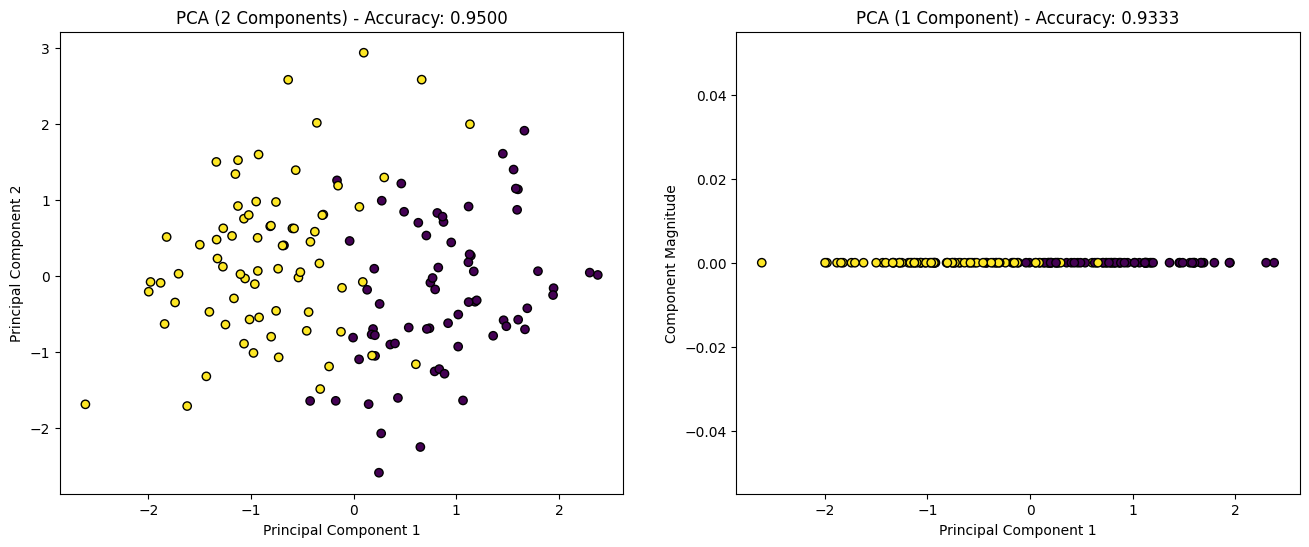

In [ ]:
# PCA with 2 components
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)
print("Explained Variance Ratio:", explained_variance)

# PCA with 1 component
pca_1 = PCA(n_components=1)
X_train_pca_1 = pca_1.fit_transform(X_train)
X_test_pca_1 = pca_1.transform(X_test)

# Classifier for PCA transformed data (2 components)
clf_pca_2 = LogisticRegression()
clf_pca_2.fit(X_train_pca_2, y_train)
y_pred_pca_2 = clf_pca_2.predict(X_test_pca_2)
accuracy_pca_2 = accuracy_score(y_test, y_pred_pca_2)

# Classifier for PCA transformed data (1 component)
clf_pca_1 = LogisticRegression()
clf_pca_1.fit(X_train_pca_1, y_train)
y_pred_pca_1 = clf_pca_1.predict(X_test_pca_1)
accuracy_pca_1 = accuracy_score(y_test, y_pred_pca_1)

# Plot PCA 2 components and PCA 1 component
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=y_train, cmap='viridis', edgecolor='k')
axes[0].set_title(f'PCA (2 Components) - Accuracy: {accuracy_pca_2:.4f}')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

axes[1].scatter(X_train_pca_1[:, 0], np.zeros_like(X_train_pca_1), c=y_train, cmap='viridis', edgecolor='k')
axes[1].set_title(f'PCA (1 Component) - Accuracy: {accuracy_pca_1:.4f}')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Component Magnitude')

plt.show()


## PCA Vs. LDA

Accuracy on original data: 1.0000
Accuracy on PCA (2 components): 0.9500
Accuracy on PCA (1 component): 0.9333
Accuracy on LDA (1 component): 1.0000


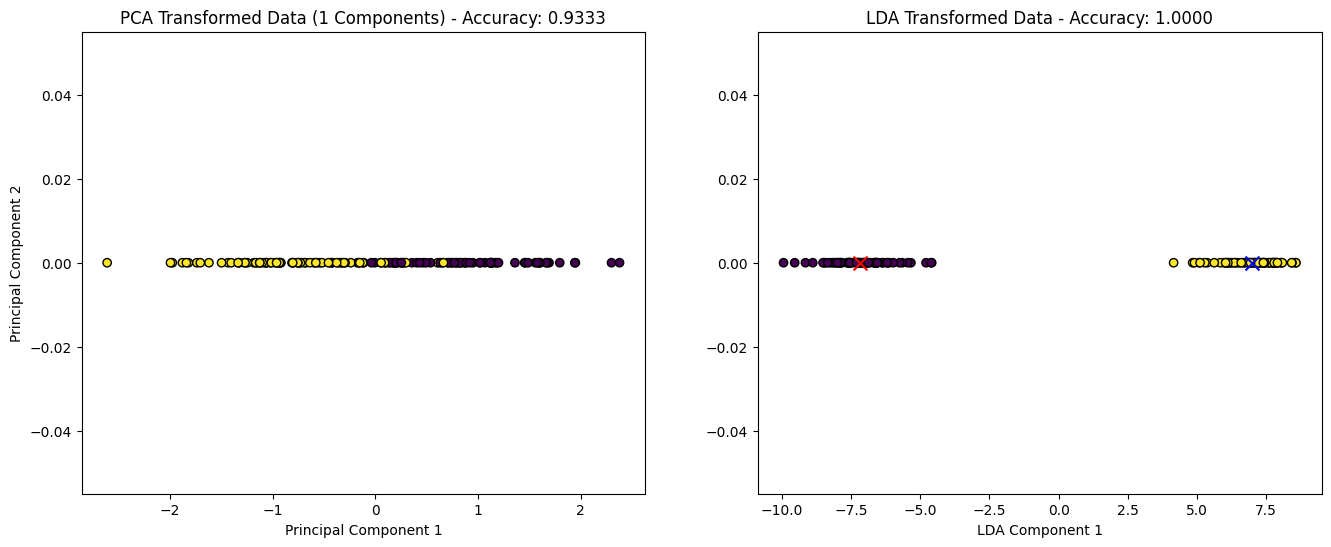

In [ ]:
# LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Calculate class centroids in LDA-transformed space
centroid_class_0 = np.mean(X_train_lda[y_train == 0])
centroid_class_1 = np.mean(X_train_lda[y_train == 1])

# Classifier for LDA transformed data
clf_lda = LogisticRegression()
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

# Print the accuracies
print(f"Accuracy on original data: {accuracy_original:.4f}")
print(f"Accuracy on PCA (2 components): {accuracy_pca_2:.4f}")
print(f"Accuracy on PCA (1 component): {accuracy_pca_1:.4f}")
print(f"Accuracy on LDA (1 component): {accuracy_lda:.4f}")

# Plot PCA (2 components) vs LDA (1 component)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].scatter(X_train_pca_1[:, 0], np.zeros_like(X_train_pca_1), c=y_train, cmap='viridis', edgecolor='k')
axes[0].set_title(f'PCA Transformed Data (1 Components) - Accuracy: {accuracy_pca_1:.4f}')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

axes[1].scatter(X_train_lda, np.zeros_like(X_train_lda), c=y_train, cmap='viridis', edgecolor='k')
axes[1].set_title(f'LDA Transformed Data - Accuracy: {accuracy_lda:.4f}')
axes[1].set_xlabel('LDA Component 1')

# Add centroids for each class in LDA
axes[1].scatter(centroid_class_0, 0, c='red', s=100, marker='x', label='Class 0 Centroid')
axes[1].scatter(centroid_class_1, 0, c='blue', s=100, marker='x', label='Class 1 Centroid')

plt.show()

# 50

## Generating and Plottind data

Accuracy on original data: 1.0000


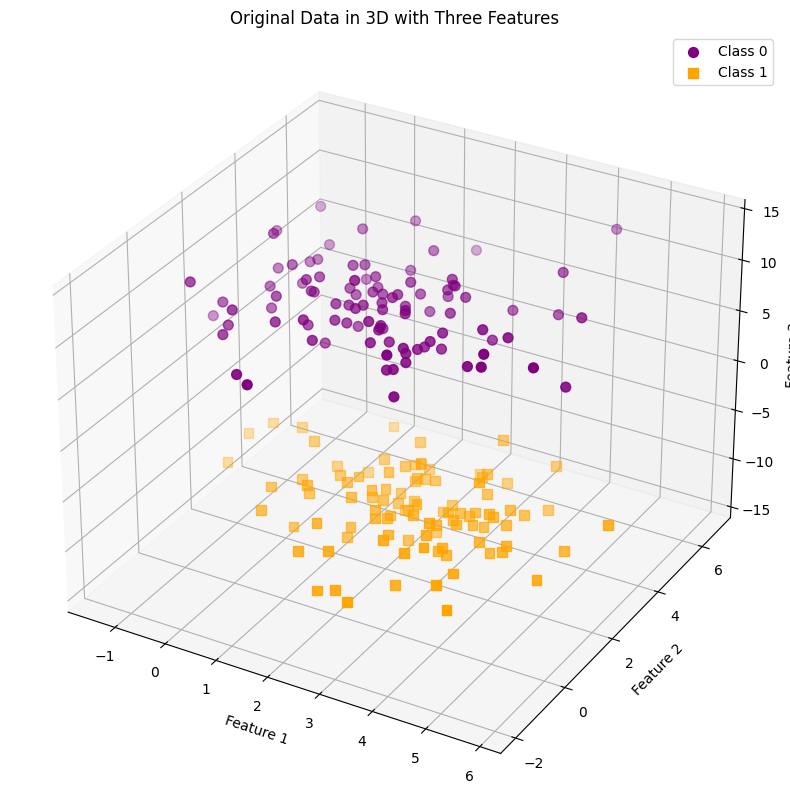

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Create a more challenging dataset with 3 features
np.random.seed(50)
n_samples = 100

# Class 1
mean1 = [2, 2, 10]
cov1 = [[2, 0, 0], [0, 2, 0], [0, 0, 2]]

# Class 2
mean2 = [2.5, 2.5, -10]
cov2 = [[2, 0, 0], [0, 2, 0], [0, 0, 2]]

data1 = np.random.multivariate_normal(mean1, cov1, n_samples)
data2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# Combine the data for both classes
features = np.vstack([data1, data2])
classes = np.array([0]*n_samples + [1]*n_samples)

# Dataframe for easier manipulation
df = pd.DataFrame(features, columns=['Feature1', 'Feature2', 'Feature3'])
df['Class'] = classes

# Separate features and class labels
X = df[['Feature1', 'Feature2', 'Feature3']].values
y = df['Class'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Logistic Regression on the original data (without PCA or LDA)
clf_original = LogisticRegression()
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy on original data: {accuracy_original:.4f}")

# Plot original data with legend instead of colorbar in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the two classes with different markers and colors
for class_value, marker, color in zip([0, 1], ['o', 's'], ['purple', 'orange']):
    ax.scatter(X[y == class_value][:, 0], X[y == class_value][:, 1], X[y == class_value][:, 2],
               marker=marker, color=color, label=f'Class {class_value}', s=50)

# Set labels and title
ax.set_title('Original Data in 3D with Three Features')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()

plt.show()

## PCA with 2 and 1 components

Explained Variance Ratio: [0.666331   0.18430875]


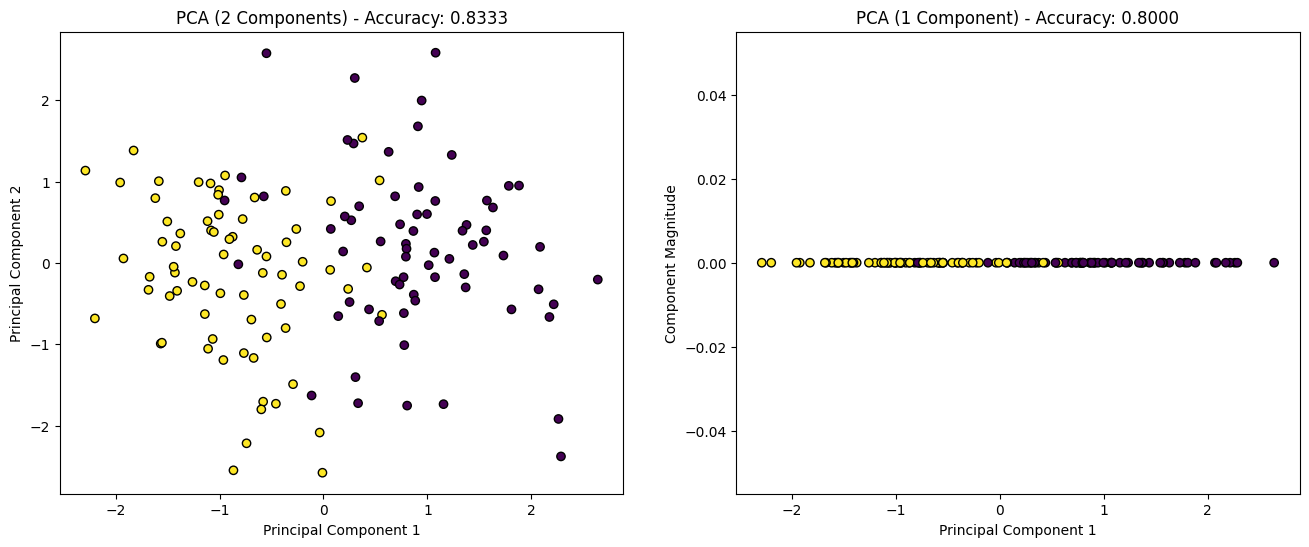

In [ ]:
# PCA with 2 components
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)
print("Explained Variance Ratio:", explained_variance)

# PCA with 1 component
pca_1 = PCA(n_components=1)
X_train_pca_1 = pca_1.fit_transform(X_train)
X_test_pca_1 = pca_1.transform(X_test)

# Classifier for PCA transformed data (2 components)
clf_pca_2 = LogisticRegression()
clf_pca_2.fit(X_train_pca_2, y_train)
y_pred_pca_2 = clf_pca_2.predict(X_test_pca_2)
accuracy_pca_2 = accuracy_score(y_test, y_pred_pca_2)

# Classifier for PCA transformed data (1 component)
clf_pca_1 = LogisticRegression()
clf_pca_1.fit(X_train_pca_1, y_train)
y_pred_pca_1 = clf_pca_1.predict(X_test_pca_1)
accuracy_pca_1 = accuracy_score(y_test, y_pred_pca_1)

# Plot PCA 2 components and PCA 1 component
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=y_train, cmap='viridis', edgecolor='k')
axes[0].set_title(f'PCA (2 Components) - Accuracy: {accuracy_pca_2:.4f}')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

axes[1].scatter(X_train_pca_1[:, 0], np.zeros_like(X_train_pca_1), c=y_train, cmap='viridis', edgecolor='k')
axes[1].set_title(f'PCA (1 Component) - Accuracy: {accuracy_pca_1:.4f}')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Component Magnitude')

plt.show()


## PCA Vs. LDA

Accuracy on original data: 1.0000
Accuracy on PCA (2 components): 0.8333
Accuracy on PCA (1 component): 0.8000
Accuracy on LDA (1 component): 1.0000


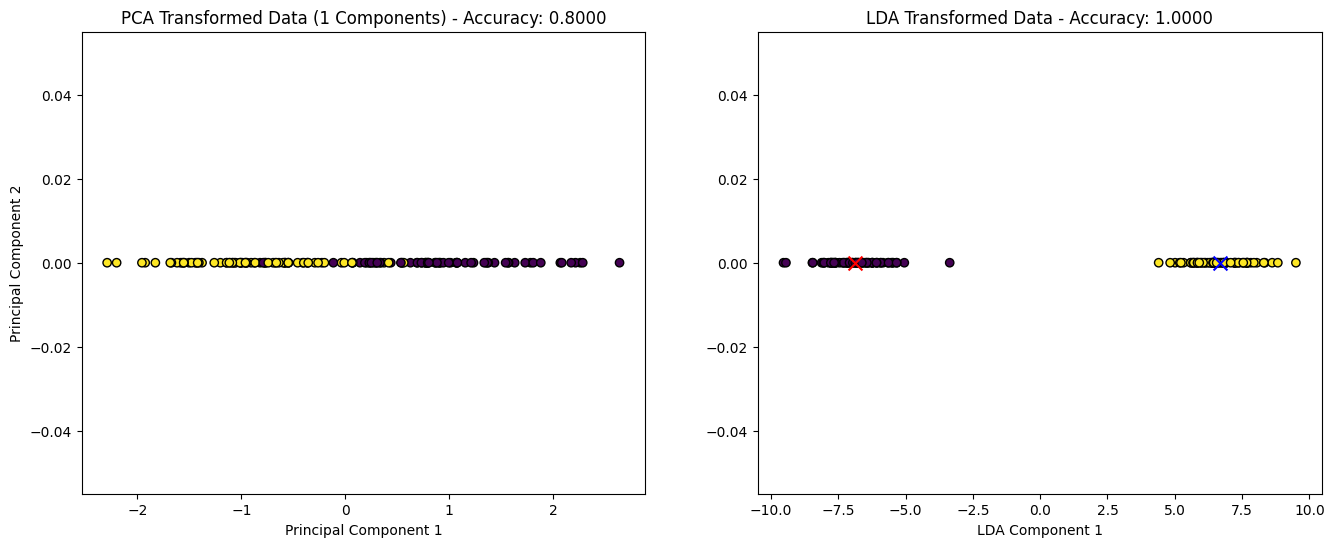

In [ ]:
# LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Calculate class centroids in LDA-transformed space
centroid_class_0 = np.mean(X_train_lda[y_train == 0])
centroid_class_1 = np.mean(X_train_lda[y_train == 1])

# Classifier for LDA transformed data
clf_lda = LogisticRegression()
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

# Print the accuracies
print(f"Accuracy on original data: {accuracy_original:.4f}")
print(f"Accuracy on PCA (2 components): {accuracy_pca_2:.4f}")
print(f"Accuracy on PCA (1 component): {accuracy_pca_1:.4f}")
print(f"Accuracy on LDA (1 component): {accuracy_lda:.4f}")

# Plot PCA (2 components) vs LDA (1 component)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].scatter(X_train_pca_1[:, 0], np.zeros_like(X_train_pca_1), c=y_train, cmap='viridis', edgecolor='k')
axes[0].set_title(f'PCA Transformed Data (1 Components) - Accuracy: {accuracy_pca_1:.4f}')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

axes[1].scatter(X_train_lda, np.zeros_like(X_train_lda), c=y_train, cmap='viridis', edgecolor='k')
axes[1].set_title(f'LDA Transformed Data - Accuracy: {accuracy_lda:.4f}')
axes[1].set_xlabel('LDA Component 1')

# Add centroids for each class in LDA
axes[1].scatter(centroid_class_0, 0, c='red', s=100, marker='x', label='Class 0 Centroid')
axes[1].scatter(centroid_class_1, 0, c='blue', s=100, marker='x', label='Class 1 Centroid')

plt.show()